# **[LS22] UC Berkeley Admission Rate**

In [1]:
import numpy as np
import pandas as pd

<br/>

<hr style="border: 1px solid #fdb515;" />

# INSTRUCTOR ONLY: SPLIT 1 (1.2, 2.1, 2.2, 3.1, 3.2)

## Takeaways
- **1.2 Shared Reality and Modeling**
    - Feel optimistic about the capacity of science to help solve problems for societal and personal decision-making. 
    - Understand the assummption of shared reality with regular patterns and the power of empirical evidence as a way to reality
- **2.1 Senses and Instrumentation**
    - Place appropriate trust in instruments where direct observation is not possible (or less precise/ accurate)
    - Understand that interaction with reality instruments can extend the belief of a shared objective reality to objects and phenomena to which our raw senses do not have direct access
    - Understand the challenges of validating an instrument and general methods of validation
- **2.2 Systematic and Statistical Uncertainty**
    - Realize that our contact with reality is often mediated by measurement and quantification. We need to be aware that every measurement comes with some degree of uncertainty (deviation from the "true" value in reality).
    - Identify sources of measurement uncertainty/error that introduce statistical uncertainty/error, that introduce systematic uncertainty/error, and that introduce both.
    - Recognize the difficulty of removing systematic uncertainty, and that the process of science involves creativity in identifying sources of systematic uncertainty and inventing strategies to reduce or eliminate them.
- **3.1 Probabilistic Reasoning**
    -  Recognize that every claim comes with some degree of uncertainty.
    - Learn the function/utility of scientific expressions of uncertainty. - Back-up plans are important since no information is absolutely certain.
- **3.2 Calibration of Credence Level**
    - Be wary of high levels of confidence.
    - Appreciate that one can improve on the calibration of their credence levels, and one should strive to reach an accurate calibration.

<br/>

<hr style="border: 1px solid #fdb515;" />

A university's admission is related to the different aspects of the society, and often becomes a reflection on societal's values and dynamic. For this part of the assignment, we will be working with **UC Berkeley's 1973 graduate admission** dataset to further explore how gender (recorded binary during 1973: Female and Male) plays a role in admission.

Suppose you are an investigator from the State of California examining admissions in the UC system schools. Before diving into the dataset, consider your direct observations around campus or in classroom to understand the shared reality.

<!-- BEGIN QUESTION -->
**Question 1:**
Based on what you see, can you suggest any trends in admission rates across different gender identities? How reliable are these observations in reflecting actual admission rates, and what are the potential limitations of using sensory information to gauge this? Answer will vary.

- Note: When discussing gender, please be considerate of the diversity in gender identities. Your insights should reflect personal observations and are subjective.

_Answer here_

<!--- END QUESTION -->


<!-- BEGIN QUESTION -->
**Question 2:**: In what ways can we understand reality beyond our sense? What is a potential harm or biases in data collection? Identify at least two potential biases that might impact the fairness of the admissions process. Discuss how these biases could originate and propose methods that could be used to mitigate these biases in future admissions cycles.

_Answer here_

<!-- End QUESTION -->

Now, let's load our dataset `berkeley.csv` below.

In [7]:
admission_data = pd.read_csv("berkeley.csv")
admission_data.head(10)

,Year,Major,Gender,Admission
0,1973,C,F,Rejected
1,1973,B,M,Accepted
2,1973,Other,F,Accepted
3,1973,Other,M,Accepted
4,1973,Other,M,Rejected
5,1973,Other,M,Rejected
6,1973,F,F,Accepted
7,1973,Other,M,Accepted
8,1973,Other,M,Rejected
9,1973,A,M,Accepted


In [3]:
# Instructor Note: # make sure the csv is in the same file path as this notebook. If not, we will have tell them the path to the csv.

<!-- END QUESTION -->


<!-- START QUESTION -->
**Question 3**: Create a new table `admission_rate_per_gender`by grouping the original dataset by gender. Your table should include aggregated data frame with three columns, `Gender`, `total_applications`, and `accepted_applicatns`, to calculate the acceptance rate in the next question.

* *Hint 1: There should be only two rows for the table.*
* *Hint 2: In Data C8, we learned the method `group`. Pandas have similar method called `groupby`. You can find the documentation for this method [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)*.
* *Hint 3: If you `.groupby` a column, that becomes the index. Consider using `reset_index()` for resetting the index.*
* *Hint 4: Panda's `.agg` ([documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.agg.html)) and `lambda` can be helpful for this question.*


In [4]:
# fill out the ...
admission_per_gender = ...
admission_per_gender.head()

AttributeError: 'ellipsis' object has no attribute 'head'

In [16]:
# Instructor Note/ Solution
addmission_per_gender = admission_data.groupby('Gender').agg(
    total_applications=('Admission', 'size'),
    accepted_applications=('Admission', lambda x: (x == 'Accepted').sum())).reset_index()
addmission_per_gender.head()


,Gender,total_applications,accepted_applications
0,F,4321,1494
1,M,8442,3738


<!-- END QUESTION -->


<!-- START QUESTION -->
**Question 4**: Using the table you created in **Question 3** that includes the total and accepted applications for each gender, calculate the acceptance rate for each gender and create a new table called `acceptance_rate_tbl` with two column `Gender` and `Acceptance_Rate`. For clarification, the acceptance rate should be count of accepted divided by total count of application.

* *Hint 1: Use the `.assign` method ([documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.assign.html)) to create the new column for the admission rate.*

    Here's an example how to use the `.assign` method
    ```js
    new_dataframe = old_dataframe.assign( New_Column_Name = lambda x: x['Column1'] / x['Column2'])


In [ ]:
# fill out the ...

acceptance_rate_tbl = ... 
acceptance_rate_tbl.head()

In [20]:
# Instructor Note/ Solution
acceptance_rate_tbl = addmission_per_gender.assign( 
    Admission_Rate=lambda x: x['accepted_applications'] / x['total_applications']
)[['Gender', 'Admission_Rate']]  # Selecting only the required columns

acceptance_rate_tbl


,Gender,Admission_Rate
0,F,0.345753
1,M,0.442786


<!-- END QUESTION -->


<!-- START QUESTION -->
**Question 5**: Using this new table, create a bar graph showing each gender's admission rate. Documentation to plot bar graph in seaborn is linked [here](https://seaborn.pydata.org/generated/seaborn.barplot.html).

<Axes: xlabel='Gender', ylabel='Admission_Rate'>

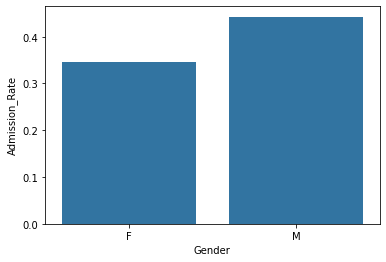

In [22]:
import seaborn as sns
sns.barplot(data=acceptance_rate_tbl, x = "Gender", y = "Admission_Rate")

<!-- END QUESTION -->


<!-- START QUESTION -->
**Question 6**: Analyze the graph displayed above. Based on the data presented try to discuss:
1. Any observable trends or differences in admission rates between male and female applicants at UC Berkeley during 1973.
2. How the biases identified in **Question 2** might influence your interpretation of these trends or differences. What might these trends imply about UC Berkeley's admissions process in that year?

*Note: Your interpretation should focus on connecting the visual data from the graph to possible conclusions about UC Berkeley's admission practices. Answer may vary.*

_Answer here_

In [41]:
# Instructor Note/ Solution

# Students' answers may vary, but hopefully we have guided the students to believe the false narrative that male is more likely to be accepted.

<!-- END QUESTION -->


<!-- START QUESTION -->
**Question 7**: Now based on your analysis in **Question 6**, what claims and notes would you make in your report? Establish a credence level to your claim and explain why. Consider any biases that may impact the credibility or interpretation of your findings.

_Answer here_

<br/>

<hr style="border: 1px solid #fdb515;" />

### Disucssion Portion - To be Inserted at Chapter 3.2

<!-- END QUESTION -->


<!-- START QUESTION -->
**Question 8**: Besides examining admission rates in relation to gender, what other factors would you consider important to explore to fully understand the dynamics of UC Berkeley's admission process? Discuss how these factors could interact with gender or independently affect admission decisions. Answer may vary. 

_Answer Here_

<!-- END QUESTION -->


<!-- START QUESTION -->
**Question 9**:  The higher-ups from the state government would like to use your report to make new legislative decisions. Reflect on how your understanding of biases and the conclusions drawn from your data analysis might impact these data-driven decisions. Who would this affect the most? Answer may vary. 

_Answer Here_

<!-- END QUESTION -->

End of the assignment! 😄 Great job! We will come back to this as part 2. later during the semester. 